# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

In [1]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

In [2]:
ref =[]
with open('horse_data.names', 'r') as file:
    for row in file:
        row = row.strip()
        name_col = r'\d{1,2}\:\s+\S+'
        if not re.findall(name_col, row):
            continue
        else:
            row2 = re.sub(r'(\d{1,2}\:\s+)(\S+)', r'\2', row)
            ref.append(row2)
for  i, name in enumerate (ref):
    if name =='25, 26, type of lesion':
        ref[ref.index(name)] = '25 type of lesion'
        ref.insert(i+1, '26 type of lesion')
        ref.insert(i+2, '27 type of lesion')

print(ref)

['surgery?', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', "pain - a subjective judgement of the horse's pain level", 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination - feces', 'abdomen', 'packed cell volume', 'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion?', '25 type of lesion', '26 type of lesion', '27 type of lesion', 'cp_data']


In [3]:
#загрузим датасет 
df_horse = pd.read_csv("horse_data.csv", header=None)
df_horse.columns = ref

In [4]:
df_horse = df_horse.replace('?', np.nan)
df_horse.head()

,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,25 type of lesion,26 type of lesion,27 type of lesion,cp_data
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2


In [5]:
for col in df_horse.columns:
    df_horse[col] = pd.to_numeric(df_horse[col])

In [6]:
df_horse.describe() 

,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,25 type of lesion,26 type of lesion,27 type of lesion,cp_data
count,299.000000,300.000000,3.000000e+02,240.000000,276.000000,242.000000,244.000000,231.000000,253.000000,268.000000,...,271.000000,267.000000,135.000000,102.000000,299.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.397993,1.640000,1.085889e+06,38.167917,71.913043,30.417355,2.348361,2.017316,2.853755,1.305970,...,46.295203,24.456929,2.037037,3.019608,1.551839,1.363333,3657.880000,90.226667,7.363333,1.670000
std,0.490305,2.173972,1.529801e+06,0.732289,28.630557,17.642231,1.045054,1.042428,1.620294,0.477629,...,10.419335,27.475009,0.804905,1.968567,0.737187,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,23.000000,3.300000,1.000000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,5.289040e+05,37.800000,48.000000,18.500000,1.000000,1.000000,1.000000,1.000000,...,38.000000,6.500000,1.000000,2.000000,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,24.500000,3.000000,2.000000,3.000000,1.000000,...,45.000000,7.500000,2.000000,2.250000,1.000000,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,...,52.000000,57.000000,3.000000,3.900000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,...,75.000000,89.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,7111.000000,2209.000000,2.000000


In [7]:
for col in df_horse.columns:
    pct_missing = df_horse[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

surgery? - 0.3%
Age - 0.0%
Hospital Number - 0.0%
rectal temperature - 20.0%
pulse - 8.0%
respiratory rate - 19.3%
temperature of extremities - 18.7%
peripheral pulse - 23.0%
mucous membranes - 15.7%
capillary refill time - 10.7%
pain - a subjective judgement of the horse's pain level - 18.3%
peristalsis - 14.7%
abdominal distension - 18.7%
nasogastric tube - 34.7%
nasogastric reflux - 35.3%
nasogastric reflux PH - 82.3%
rectal examination - feces - 34.0%
abdomen - 39.3%
packed cell volume - 9.7%
total protein - 11.0%
abdominocentesis appearance - 55.0%
abdomcentesis total protein - 66.0%
outcome - 0.3%
surgical lesion? - 0.0%
25 type of lesion - 0.0%
26 type of lesion - 0.0%
27 type of lesion - 0.0%
cp_data - 0.0%


1: surgery? (категориальная величина). Была ли сделана операция, количество пропущенных значений 1 - можно исключить из выборки
  
      1 -- Yes, it had surgery
      2 -- It was treated without surgery
  
2:  Age (категориальная величина) Возраст, нет пропущенных значений

      1 --Adult horse
      2 -- Young (< 6 months)
      
3:  Hospital Number (может дать понимание сколько лошадей лечились повторно) , нет пропущенных значений

      - numeric id
      - the case number assigned to the horse
        (may not be unique if the horse is treated > 1 time)
        
4:  rectal temperature количественная величина, можно перевести в качественную относительно нормальной температуры, процент пропусков 20%, пропуски можно попытаться заполнить средним значением, а зависимости от других показателей(например: surgery, age, temperature of extremities) 

      - linear
      - in degrees celsius.
      - An elevated temp may occur due to infection.
      - temperature may be reduced when the animal is in late shock
      - normal temp is 37.8
      - this parameter will usually change as the problem progresses
           eg. may start out normal, then become elevated because of
               the lesion, passing back through the normal range as the
               horse goes into shock
               
5:  pulse количественная величина процент пропусков 8%, можно попытаться заполнить относительно rectal temperature

      - linear
      - the heart rate in beats per minute
      - is a reflection of the heart condition: 30 -40 is normal for adults
      - rare to have a lower than normal rate although athletic horses
        may have a rate of 20-25
      - animals with painful lesions or suffering from circulatory shock
        may have an elevated heart rate

             
7:  temperature of extremities (категориальная величина) процент пропусков 8%, можно попытаться заполнить относительно rectal temperature

      - a subjective indication of peripheral circulation
      - possible values:
           1 = Normal
           2 = Warm
           3 = Cool
           4 = Cold
      - cool to cold extremities indicate possible shock
      - hot extremities should correlate with an elevated rectal temp.
 
19: packed cell volume количественная величина, процент пропусков 9,7 

      - linear
      - the # of red cells by volume in the blood
      - normal range is 30 to 50. The level rises as the circulation
        becomes compromised or as the animal becomes dehydrated.
        
20: total protein количественная величина, процент пропусков 11 

      - linear
      - normal values lie in the 6-7.5 (gms/dL) range
      - the higher the value the greater the dehydration
      
23: outcome,  конечный показатель, пропуски в котором могут быть заполнены допущением на основаниии всех остальных показателей

      - what eventually happened to the horse?
      - possible values:
           1 = lived
           2 = died
           3 = was euthanized
           
28: cp_data

      - is pathology data present for this case?
           1 = Yes
           2 = No
      - this variable is of no significance since pathology data
        is not included or collected for these cases

In [8]:
df_horse.Age.value_counts() # вероятно ошибка в данных 9 вместо 2 в описании

1    276
9     24
Name: Age, dtype: int64

In [9]:
# выберем стщдицы с которыми будем работать
df = df_horse[['surgery?', 'Age', 'rectal temperature', 'pulse',  'temperature of extremities',  'packed cell volume', 'total protein', 'outcome', 'cp_data']]
df

,surgery?,Age,rectal temperature,pulse,temperature of extremities,packed cell volume,total protein,outcome,cp_data
0,2.0,1,38.5,66.0,3.0,45.0,8.4,2.0,2
1,1.0,1,39.2,88.0,NaN,50.0,85.0,3.0,2
2,2.0,1,38.3,40.0,1.0,33.0,6.7,1.0,1
3,1.0,9,39.1,164.0,4.0,48.0,7.2,2.0,1
4,2.0,1,37.3,104.0,NaN,74.0,7.4,2.0,2
...,...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,4.0,55.0,65.0,3.0,2
296,2.0,1,37.2,72.0,3.0,44.0,NaN,3.0,1
297,1.0,1,37.5,72.0,4.0,60.0,6.8,2.0,2
298,1.0,1,36.5,100.0,3.0,50.0,6.0,1.0,1


In [10]:
# рассчитаем статистические метрики для количественных величин
df[['rectal temperature', 'pulse',  'packed cell volume', 'total protein']].describe()

,rectal temperature,pulse,packed cell volume,total protein
count,240.000000,276.000000,271.000000,267.000000
mean,38.167917,71.913043,46.295203,24.456929
std,0.732289,28.630557,10.419335,27.475009
min,35.400000,30.000000,23.000000,3.300000
25%,37.800000,48.000000,38.000000,6.500000
50%,38.200000,64.000000,45.000000,7.500000
75%,38.500000,88.000000,52.000000,57.000000
max,40.800000,184.000000,75.000000,89.000000


### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

1. Значение total protein выбросы в районе 40-80, при нормальном значении в районе 6,5-7

Text(0.5, 1.0, 'Распределение значения total protein')

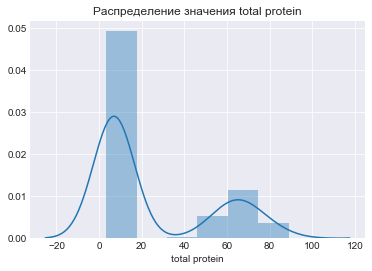

In [11]:
# При помощи seaborn
sns.distplot(df['total protein'])
plt.title("Распределение значения total protein")

Есть гипотеза, что тут явная ошибка в порядке данных. Решение проблемы - 1) исправить в зависимости с предположением, 2) отсечь

In [12]:
df[df['total protein']> 20]['total protein'].describe()

count    79.000000
mean     66.101266
std       8.748033
min      46.000000
25%      60.000000
50%      65.000000
75%      70.500000
max      89.000000
Name: total protein, dtype: float64

причем как видим судя по диапазону на 1 порядок. мы можем убрать эти данные из выюорки но тогда мы потеряем большое количество данных

In [13]:
df_crop = df[ (df['total protein'] < 46) ]
df_crop[['rectal temperature', 'pulse',  'packed cell volume', 'total protein']].describe()

,rectal temperature,pulse,packed cell volume,total protein
count,151.000000,173.000000,185.000000,188.000000
mean,38.201987,73.080925,46.778378,6.957447
std,0.774034,28.693738,10.629485,1.157305
min,36.000000,30.000000,23.000000,3.300000
25%,37.800000,50.000000,39.000000,6.300000
50%,38.200000,66.000000,45.000000,6.850000
75%,38.600000,90.000000,52.000000,7.525000
max,40.800000,184.000000,74.000000,13.000000


In [14]:
# попробуем применить гипотезу 1
df.loc[df['total protein'] > 45, 'total protein'] = df['total protein']/10

C:\Users\fines\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [15]:
df[['rectal temperature', 'pulse',  'packed cell volume', 'total protein']].describe()

,rectal temperature,pulse,packed cell volume,total protein
count,240.000000,276.000000,271.000000,267.000000
mean,38.167917,71.913043,46.295203,6.854682
std,0.732289,28.630557,10.419335,1.091425
min,35.400000,30.000000,23.000000,3.300000
25%,37.800000,48.000000,38.000000,6.200000
50%,38.200000,64.000000,45.000000,6.700000
75%,38.500000,88.000000,52.000000,7.500000
max,40.800000,184.000000,75.000000,13.000000


Text(0.5, 1.0, 'Распределение значения total protein')

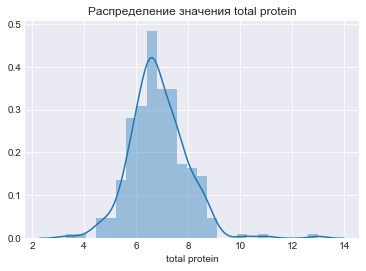

In [16]:
sns.distplot(df['total protein'])
plt.title("Распределение значения total protein") 

Полученная кривая очень похожа на нормальное распределение

Рассмотрим выбросы по величине pulse

Text(0.5, 1.0, 'Распределение значения pulse')

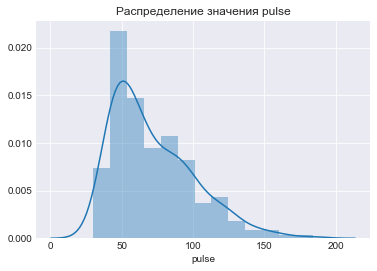

In [17]:
sns.distplot(df['pulse'])
plt.title("Распределение значения pulse")

In [18]:
q1 = df.pulse.quantile(0.25)
q3 = df.pulse.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers_pulse = df[df.pulse.between(lower_bound, upper_bound, inclusive=True)]
remove_outliers_pulse

,surgery?,Age,rectal temperature,pulse,temperature of extremities,packed cell volume,total protein,outcome,cp_data
0,2.0,1,38.5,66.0,3.0,45.0,8.4,2.0,2
1,1.0,1,39.2,88.0,NaN,50.0,8.5,3.0,2
2,2.0,1,38.3,40.0,1.0,33.0,6.7,1.0,1
4,2.0,1,37.3,104.0,NaN,74.0,7.4,2.0,2
6,1.0,1,37.9,48.0,1.0,37.0,7.0,1.0,2
...,...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,4.0,55.0,6.5,3.0,2
296,2.0,1,37.2,72.0,3.0,44.0,NaN,3.0,1
297,1.0,1,37.5,72.0,4.0,60.0,6.8,2.0,2
298,1.0,1,36.5,100.0,3.0,50.0,6.0,1.0,1


In [19]:
remove_outliers_pulse[['rectal temperature', 'pulse',  'packed cell volume', 'total protein']].describe()

,rectal temperature,pulse,packed cell volume,total protein
count,229.000000,271.000000,249.000000,246.000000
mean,38.136681,70.258303,46.381526,6.872358
std,0.728288,26.082484,10.269014,1.081179
min,35.400000,30.000000,23.000000,4.000000
25%,37.800000,48.000000,39.000000,6.200000
50%,38.100000,64.000000,45.000000,6.700000
75%,38.500000,88.000000,52.000000,7.500000
max,40.800000,146.000000,75.000000,13.000000


Text(0.5, 1.0, 'Распределение значения pulse')

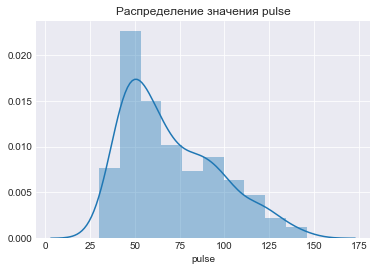

In [20]:
sns.distplot(remove_outliers_pulse['pulse'])
plt.title("Распределение значения pulse")

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [21]:
for col in remove_outliers_pulse.columns:
    pct_missing = remove_outliers_pulse[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

surgery? - 0.4%
Age - 0.0%
rectal temperature - 15.5%
pulse - 0.0%
temperature of extremities - 17.0%
packed cell volume - 8.1%
total protein - 9.2%
outcome - 0.4%
cp_data - 0.0%


**Заметим, что по столбцу по которому мы удаляли выбросы вместе с выбросами сократились и незаполненные значения поэтому я предлагаю вернуться и первым действием заполнить пропуски в нем  медианным значением в зависимости от (путем долгих экспериментов) возраста, наличия операций и состояния после лечения**

In [22]:
df_horse.pulse.fillna(df.groupby(['Age', 'surgery?', 'cp_data']).pulse.transform('median'), inplace=True)

In [23]:
# df_horse['rectal temperature'].fillna(df.groupby(['Age', 'surgery?', 'pulse', 'cp_data'])['rectal temperature'].transform('median'), inplace=True)

In [24]:
# df_horse['rectal temperature'].fillna(df.groupby(['Age', 'surgery?', 'temperature of extremities', 'cp_data'])['rectal temperature'].transform('median'), inplace=True)

In [25]:
df_horse['rectal temperature'].fillna(df.groupby(['Age', 'surgery?', 'cp_data'])['rectal temperature'].transform('median'), inplace=True)

In [26]:
# df_horse['temperature of extremities'].fillna(df.groupby(['rectal temperature'])['temperature of extremities'].transform('median'), inplace=True)

In [27]:
df_horse['temperature of extremities'].fillna(df.groupby(['Age', 'surgery?', 'cp_data'])['temperature of extremities'].transform('median'), inplace=True)

In [28]:
# df_horse['total protein'].fillna(df.groupby(['Age', 'surgery?', 'rectal temperature'])['total protein'].transform('median'), inplace=True)

In [29]:
# df_horse['total protein'].fillna(df.groupby(['pulse'])['total protein'].transform('median'), inplace=True)

In [30]:
df_horse['total protein'].fillna(df.groupby(['Age', 'surgery?', 'cp_data'])['total protein'].transform('median'), inplace=True)

In [31]:
df_horse['packed cell volume'].fillna(df.groupby(['Age', 'surgery?', 'cp_data'])['packed cell volume'].transform('median'), inplace=True)

In [32]:
for col in df_horse.columns:
    pct_missing = df_horse[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

surgery? - 0.3%
Age - 0.0%
Hospital Number - 0.0%
rectal temperature - 0.0%
pulse - 0.0%
respiratory rate - 19.3%
temperature of extremities - 0.0%
peripheral pulse - 23.0%
mucous membranes - 15.7%
capillary refill time - 10.7%
pain - a subjective judgement of the horse's pain level - 18.3%
peristalsis - 14.7%
abdominal distension - 18.7%
nasogastric tube - 34.7%
nasogastric reflux - 35.3%
nasogastric reflux PH - 82.3%
rectal examination - feces - 34.0%
abdomen - 39.3%
packed cell volume - 0.0%
total protein - 0.0%
abdominocentesis appearance - 55.0%
abdomcentesis total protein - 66.0%
outcome - 0.3%
surgical lesion? - 0.0%
25 type of lesion - 0.0%
26 type of lesion - 0.0%
27 type of lesion - 0.0%
cp_data - 0.0%


In [33]:
df2 = df_horse[['surgery?', 'Age', 'rectal temperature', 'pulse',  'temperature of extremities',  'packed cell volume', 'total protein', 'outcome', 'cp_data']]
df2.dropna(inplace=True)
df2

C:\Users\fines\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,surgery?,Age,rectal temperature,pulse,temperature of extremities,packed cell volume,total protein,outcome,cp_data
0,2.0,1,38.5,66.0,3.0,45.0,8.4,2.0,2
1,1.0,1,39.2,88.0,3.0,50.0,85.0,3.0,2
2,2.0,1,38.3,40.0,1.0,33.0,6.7,1.0,1
3,1.0,9,39.1,164.0,4.0,48.0,7.2,2.0,1
4,2.0,1,37.3,104.0,2.0,74.0,7.4,2.0,2
...,...,...,...,...,...,...,...,...,...
295,1.0,1,38.1,120.0,4.0,55.0,65.0,3.0,2
296,2.0,1,37.2,72.0,3.0,44.0,7.2,3.0,1
297,1.0,1,37.5,72.0,4.0,60.0,6.8,2.0,2
298,1.0,1,36.5,100.0,3.0,50.0,6.0,1.0,1


In [34]:
for col in df2.columns:
    pct_missing = df2[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

surgery? - 0.0%
Age - 0.0%
rectal temperature - 0.0%
pulse - 0.0%
temperature of extremities - 0.0%
packed cell volume - 0.0%
total protein - 0.0%
outcome - 0.0%
cp_data - 0.0%


А терерь можно проделать две операции:

    - подкорректировать значения в столбце total protein
    - сгладить выбрросы в столбце pulse

In [35]:
df2.loc[df['total protein'] > 45, 'total protein'] = df2['total protein']/10

In [36]:
q1 = df.pulse.quantile(0.25)
q3 = df.pulse.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
rem_outs_pulse = df2[df2.pulse.between(lower_bound, upper_bound, inclusive=True)]
rem_outs_pulse

,surgery?,Age,rectal temperature,pulse,temperature of extremities,packed cell volume,total protein,outcome,cp_data
0,2.0,1,38.5,66.0,3.0,45.0,8.4,2.0,2
1,1.0,1,39.2,88.0,3.0,50.0,85.0,3.0,2
2,2.0,1,38.3,40.0,1.0,33.0,6.7,1.0,1
4,2.0,1,37.3,104.0,2.0,74.0,7.4,2.0,2
5,2.0,1,38.0,52.0,2.0,43.0,6.7,1.0,2
...,...,...,...,...,...,...,...,...,...
295,1.0,1,38.1,120.0,4.0,55.0,65.0,3.0,2
296,2.0,1,37.2,72.0,3.0,44.0,7.2,3.0,1
297,1.0,1,37.5,72.0,4.0,60.0,6.8,2.0,2
298,1.0,1,36.5,100.0,3.0,50.0,6.0,1.0,1


In [37]:
rem_outs_pulse[['rectal temperature', 'pulse',  'packed cell volume', 'total protein']].describe()

,rectal temperature,pulse,packed cell volume,total protein
count,294.000000,294.000000,294.000000,294.000000
mean,38.150510,70.074830,46.210884,22.612925
std,0.660921,25.640755,9.980258,26.523775
min,35.400000,30.000000,23.000000,4.000000
25%,37.900000,48.000000,39.000000,6.600000
50%,38.100000,64.000000,45.000000,7.200000
75%,38.500000,88.000000,50.000000,53.750000
max,40.800000,146.000000,75.000000,89.000000


## Дополнительная часть (необязательная)

Выполнить задания 1-3 для всего набора данных.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.